In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
training_set = pd.read_csv('data/SP500/tickers/GOOG.csv')
training_set = training_set.iloc[:,5:6].values



In [2]:
training_set.shape

(1239, 1)

In [3]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)

# Getting the inputs and the ouputs
X_train = training_set[0:1238]
y_train = training_set[1:1239]

# Reshaping
X_train = np.reshape(X_train, (1238, 1, 1))

In [4]:
X_train.shape

(1238, 1, 1)

In [5]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [6]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
1238/1238 [==============================] - 3s - loss: 0.3146     
Epoch 2/100
1238/1238 [==============================] - 0s - loss: 0.2318     
Epoch 3/100
1238/1238 [==============================] - 0s - loss: 0.1719     
Epoch 4/100
1238/1238 [==============================] - 0s - loss: 0.1300     
Epoch 5/100
1238/1238 [==============================] - 0s - loss: 0.1018     
Epoch 6/100
1238/1238 [==============================] - 0s - loss: 0.0836     
Epoch 7/100
1238/1238 [==============================] - 0s - loss: 0.0721     
Epoch 8/100
1238/1238 [==============================] - 0s - loss: 0.0653     
Epoch 9/100
1238/1238 [==============================] - 0s - loss: 0.0613     
Epoch 10/100
1238/1238 [==============================] - 0s - loss: 0.0591     
Epoch 11/100
1238/1238 [==============================] - 0s - loss: 0.0577     
Epoch 12/100
1238/1238 [==============================] - 0s - loss: 0.0568     
Epoch 13/100
1238/1238 [=============

1238/1238 [==============================] - 0s - loss: 1.7200e-04     


In [7]:
test_set = pd.read_csv('data/SP500/symbols/GOOG_test.csv')
test_set.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
1,2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2,2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
3,2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
4,2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400


In [8]:
test_set.shape

(19, 7)

In [9]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2018

real_stock_price = test_set.iloc[:,5:6].values

# Getting the predicted stock price of 2018
inputs = real_stock_price
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (19, 1, 1))
predicted_stock_price = regressor.predict(inputs)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)



In [10]:
real_stock_price

array([[ 1197.      ],
       [ 1186.47998 ],
       [ 1171.439941],
       [ 1164.829956],
       [ 1164.640015],
       [ 1177.359985],
       [ 1162.819946],
       [ 1175.329956],
       [ 1172.530029],
       [ 1156.050049],
       [ 1161.219971],
       [ 1171.089966],
       [ 1186.869995],
       [ 1166.089966],
       [ 1173.369995],
       [ 1184.650024],
       [ 1180.48999 ],
       [ 1194.640015],
       [ 1193.469971]])

In [11]:
predicted_stock_price

array([[ 1186.76647949],
       [ 1177.56091309],
       [ 1164.36462402],
       [ 1158.55163574],
       [ 1158.38452148],
       [ 1169.5637207 ],
       [ 1156.78234863],
       [ 1167.78161621],
       [ 1165.32250977],
       [ 1150.81799316],
       [ 1155.37365723],
       [ 1164.05700684],
       [ 1177.90258789],
       [ 1159.66027832],
       [ 1166.06030273],
       [ 1175.95751953],
       [ 1172.31018066],
       [ 1184.703125  ],
       [ 1183.6796875 ]], dtype=float32)

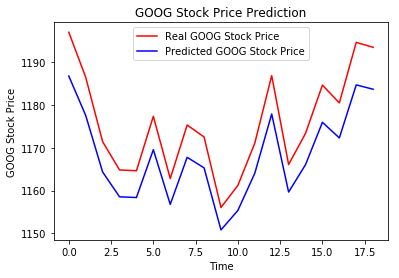

In [12]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real GOOG Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [13]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [15]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))

Score
MAE:  7.6194
RMSE: 7.7538  


In [16]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  60.1214


In [17]:
# Getting the real stock price of 2013 - 2018
real_stock_price_train = pd.read_csv('data/SP500/tickers/GOOG.csv')
real_stock_price_train = real_stock_price_train.iloc[:,5:6].values

In [18]:
real_stock_price_train = real_stock_price_train[:1272]

In [19]:
# Getting the predicted stock price of 2013 - 2018
predicted_stock_price_train = regressor.predict(X_train)
predicted_stock_price_train = sc.inverse_transform(predicted_stock_price_train)

In [20]:
print(predicted_stock_price_train.shape)

(1238, 1)


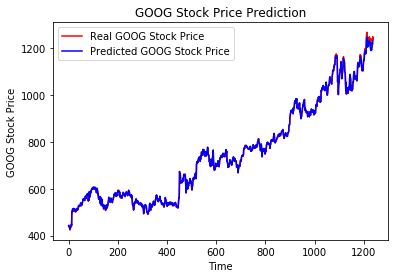

In [21]:
# Visualising the results
plt.plot(real_stock_price_train, color = 'red', label = 'Real GOOG Stock Price')
plt.plot(predicted_stock_price_train, color = 'blue', label = 'Predicted GOOG Stock Price')
plt.title('GOOG Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('GOOG Stock Price')
plt.legend()
plt.show()

In [22]:
real_stock_price_train = real_stock_price_train[:1238]
real_stock_price_train.shape

(1238, 1)

In [23]:
#  Evaluating the RNN
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price_train, predicted_stock_price_train)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price_train, predicted_stock_price_train))))

Score
MAE:  1.3937
RMSE: 2.6446  


In [24]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price_train, predicted_stock_price_train)))

MSE:  6.9940
